# Lecture 2.4: Simulating DTDS stochastic processess

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In the previous lectures we have been talking about itterating the "state vectr" through time.  The $i^{th}$ element of this state vetor, $\vec{V}(t)$ represents the probability that the system is in state $i$ at generation $t$.  However, what happens in any one **realization** of the process is random.  In this lecture we will be simulating such realizations which we call **trajectories**.

****
<span style="color:red;">**Example  2.12:**  Epigenetics</span>

**Consider a gene with two possible states: "Methylated" (M) and "Unmethylated" (U). The methylation status of the gene can change over discrete time steps.**

**State Space: State 1=Methylated (M), State 0=Unmethylated (U)**

$$
\begin{aligned}
&p_{UU}=0.9\quad \text{(90\% chance of staying unmethylated)}\\
&p_{UM}=0.1\quad \text{(10\% chance of gaining methylation)}\\
&p_{MU}=0.2\quad \text{(20\% chance of losing methylation)}\\
&p_{MM}=0.8 \quad\text{(80\% chance of staying methylated)}\\
\end{aligned}
$$

**1. What is the stationary distribution of the stochastic process?**

We have that 
$$
\begin{aligned}
&0.9 \pi_0+0.2 \pi_1=\pi_0\\
&\pi_0+\pi_1=1
\end{aligned}
$$

In [2]:
PMtrx=[[0.9,0.1],[0.2,0.8]]

In [3]:
equs=[[-0.1,0.2],[1,1]]
np.linalg.solve(equs,[0,1])

array([0.66666667, 0.33333333])

**2. Given that the state starts in the methalated state, how does the probability of being methalated $V_1(t)$ change over time?**

In [4]:
def epi_state(gMax):
    vec0=np.transpose([0,1])
    vecTemp=vec0
    out=vec0
    
    for g in range(0,gMax):
        vecTemp=vecTemp@PMtrx
        out = np.vstack((out, vecTemp))
        
    return out

In [31]:
epi_state(20)

array([[0.        , 1.        ],
       [0.1       , 0.9       ],
       [0.17      , 0.83      ],
       [0.219     , 0.781     ],
       [0.2533    , 0.7467    ],
       [0.27731   , 0.72269   ],
       [0.294117  , 0.705883  ],
       [0.3058819 , 0.6941181 ],
       [0.31411733, 0.68588267],
       [0.31988213, 0.68011787],
       [0.32391749, 0.67608251],
       [0.32674224, 0.67325776],
       [0.32871957, 0.67128043],
       [0.3301037 , 0.6698963 ],
       [0.33107259, 0.66892741],
       [0.33175081, 0.66824919],
       [0.33222557, 0.66777443],
       [0.3325579 , 0.6674421 ],
       [0.33279053, 0.66720947],
       [0.33295337, 0.66704663],
       [0.33306736, 0.66693264]])

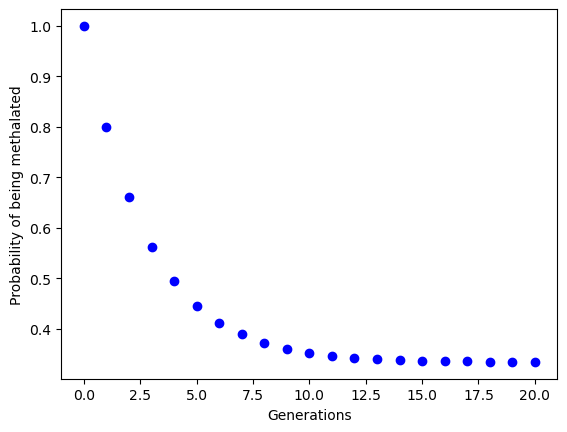

In [5]:
x_values=np.linspace(0, 20, num=21, dtype=int)
y_values=epi_state(20)[:,1]
plt.scatter(x_values, y_values, color='blue', marker='o', label='Vectors')
plt.xlabel('Generations')
plt.ylabel('Probability of being methalated');

The probability of being methalated steadily declines until it reaches the equilibrium probability of $2/3$

**3.  Simulate 20 sample trajectories of this process for 200 time steps.**

To simulate the sample trajectory, we essentially have to flip a weighted coin. To do this we rely on a function "np.random.choice".  This function takes two arguments 1) a vector of outcomes, 2) a vetor of weights "p"
and 3) an option argment of how many random draws called the "size".

For example:

In [54]:
np.random.choice([0,1], p=[0.1,0.9],size=20)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

To use this for our purposes, let's create a vector that gives the states of the stochstic process;

In [6]:
eventVec=[0,1]
print(eventVec)

[0, 1]


We can then draw the next event as a random choice of this event vector given the corresponding row of the transition probability matrix.  

In [7]:
def randSim(tMax,index): #tMax in the number of generations, index is a dummy variable we will use in a minute
   #Initialize
    out=[1]; 
    temp=1;
    #Itterate
    for t in range(tMax):
        temp=np.random.choice(eventVec, p=PMtrx[temp])
        out.append(temp)
    return out

In [8]:
temp=randSim(50,1) # The outcome is random, so let's save this particular outcome as "temp"
print(temp)

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Let's go plot this outcome.

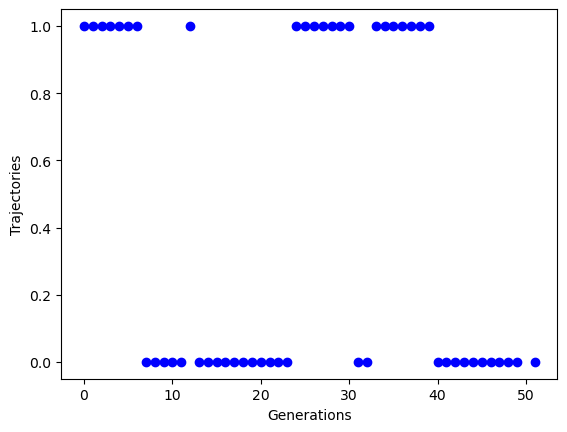

In [9]:
x_values=np.linspace(0, len(temp), num=len(temp), dtype=int)
y_values=temp
plt.scatter(x_values, y_values, color='blue', marker='o', label='Vectors')
plt.xlabel('Generations')
plt.ylabel('Trajectories');

The problem is that the outcome of these simulations are random, so it would be nice to save them in a systematic way (rather than using temp).  This is where "index" comes in.

In [10]:
# Create a dictionary to store results
results_dict = {}

# Calculate and save results for specified indices
for index in range(20):
    results_dict[index] = randSim(500,index)

Plotting the first 5.

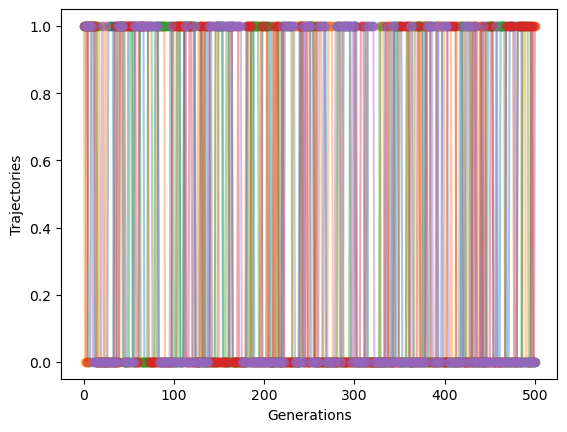

In [13]:
for index in range(5):
    plt.plot( results_dict[index], marker='o', label='Vectors',alpha=0.4)
plt.xlabel('Generations')
plt.ylabel('Trajectories');

Each colour here represents a new trajectory.


**4.Looking at the last 50 generations only, what proportion of time do the trajectories spend in state 1 (Methalation)?**

Let's count how many of the last 50 steps were in state 1.

In [16]:
counts=np.zeros(20);
for index in range(20):
    counts[index]=np.sum(results_dict[index][-50:])
print(np.average(counts))
print(np.average(counts)/50)

16.35
0.327


### so somewhere around 16.35 of 50 events or 33\% of the time

<span style="color:green;">**Discussion:**  Does this make sense?</span>

This is a nice simple system but it would be nice to have a more complex stochastic process.  Let's turn to the WF model without mutation.  

****
<span style="color:red;">**Example  2.13:**  Wright Fisher Model</span>

**Consider a haploid population of size 20 evolving under netural genetic drift alone (i.e., no mutation or selection).**

**1. Simulate the allele frequency in the population given that it starting at $p=0.5$**

In [116]:
def wright_fisher_transition_matrix(N):
    """
    Generate the transition probability matrix for the Wright-Fisher model.

    Parameters:
    - N: Population size

    Returns:
    - P: Transition probability matrix
    """

    P = np.zeros((N+1, N+1)) #Matrix of 0s

    for i in range(N+1):
        for j in range(N+1):
            P[i, j] = (np.math.comb(N, j) * ((i/N) ** j) * ((1 - i/N) ** (N - j)))

    return P

# Example usage with population size N = 20
t_matrix = wright_fisher_transition_matrix(20)

In [115]:
def eventVec(N):
    return np.arange(N+1)
print(eventVec(20))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Now we write the code, don't forget the initial conditions!

In [120]:
def randSimWF(N,tMax,index): #tMax in the number of generations, index is a dummy variable we will use in a minute
   #Initialize
    out=[10]; 
    temp=10;
    #Itterate
    for t in range(tMax):
        temp=np.random.choice(eventVec(N), p=t_matrix[temp])
        out.append(temp)
    return out

Simulating 20 trajectories each of length 100.

In [123]:
# Create a dictionary to store results
WF_dict = {}

# Calculate and save results for specified indices
for index in range(20):
    WF_dict[index] = randSimWF(20,100,index)

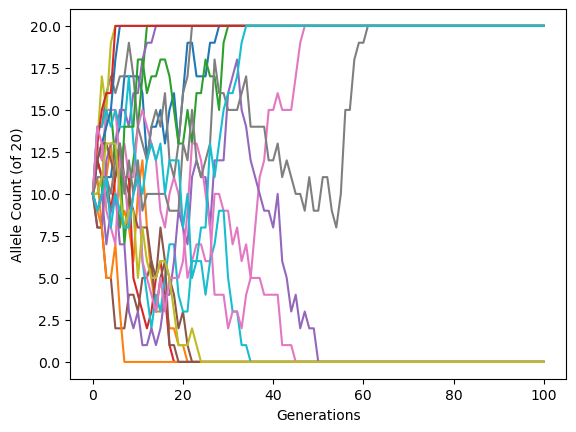

In [127]:
randSimWF(20,100,1)

for index in range(20):
    plt.plot( WF_dict[index], label='Vectors')
plt.xlabel('Generations')
plt.ylabel('Allele Count (of 20)');

**2. What happens to the mean allele count over time?**

In [130]:
temp=np.zeros(20)
avg=np.zeros(100)
for t in range(100):
    for index in range(20):
        temp[index]=WF_dict[index][t]
    avg[t]=np.average(temp)
avg

array([10.  , 11.15, 11.4 , 11.75, 11.8 , 12.25, 12.05, 11.7 , 11.75,
       11.25, 11.55, 11.25, 10.7 , 10.65, 10.45, 10.85, 10.65, 10.25,
       10.1 ,  9.6 ,  9.8 ,  9.95, 10.5 , 10.5 , 10.4 , 10.3 , 10.5 ,
       10.9 , 10.95, 11.2 , 11.15, 11.05, 11.2 , 10.95, 11.15, 10.8 ,
       10.9 , 11.  , 10.95, 11.  , 10.95, 11.15, 10.65, 10.65, 10.5 ,
       10.55, 10.55, 10.6 , 10.65, 10.55, 10.45, 10.55, 10.55, 10.45,
       10.4 , 10.5 , 10.75, 10.75, 10.9 , 10.95, 10.95, 11.  , 11.  ,
       11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  ,
       11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  ,
       11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  ,
       11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  , 11.  ,
       11.  ])

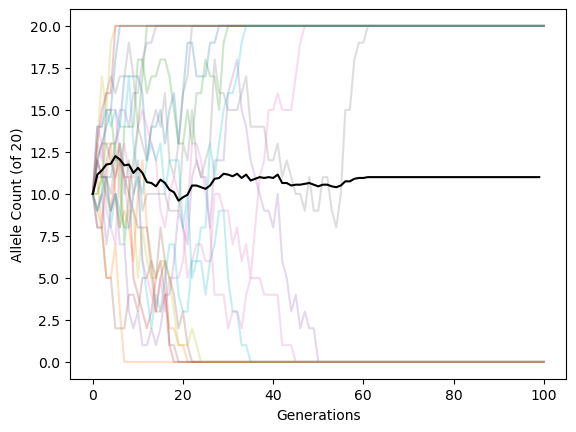

In [133]:
for index in range(20):
    plt.plot( WF_dict[index],alpha=0.25)
plt.plot( avg, color='black')
plt.xlabel('Generations')
plt.ylabel('Allele Count (of 20)');

The mean count dosn't change much!  This is the definition of NEUTRAL genetic drift.